In [6]:
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests
import pandas as pd
from numpy import corrcoef
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

#  Load the .mat files
preds = sio.loadmat('/Users/ajsimon/Documents/Data/Constable_lab/Transdiagnostic/N317/CPM_results/First_pass_1000perms/cog_preds.mat')['cog_preds_sorted']

headers_file = '/Users/ajsimon/Documents/Data/Constable_lab/Transdiagnostic/N317/CPM_results/First_pass_1000perms/cog_labels.xlsx'

# Load the header into a dataframe
headers_df = pd.read_excel(headers_file,header=None)
headers = headers_df.to_numpy()

In [7]:
# Convert headers from numpy object to a list of strings
headers = [str(header) for header in headers.flatten()]

In [8]:
headers

['dkefs_cw_cond2_scaled',
 'wais_canc_tot_scaled',
 'bnt_cr_withPhonCue',
 'dkefs_20q_totalQ_scaled',
 'dkefs_vf_cond2_scaled',
 'bnt_stimCues',
 'dkefs_tm_composite_scaled',
 'dkefs_cw_cond3_scaled',
 'dkefs_vf_cond1_scaled',
 'dkefs_tm_cond3_scaled',
 'bnt_cr_spon',
 'dkefs_tm_cond4_scaled',
 'dkefs_20q_was_scaled',
 'wais_LN_scaled',
 'wais_symbol_scaled',
 'wasi_vocab_scaled',
 'wrat_percentile',
 'wais_coding_scaled',
 'wraml_vl_cr_std',
 'wrat_cr_std',
 'wraml_FW_std',
 'bnt_phonCue',
 'bnt_totalScore_std',
 'wraml_vl_cr_delay_std',
 'wasi_mr_scaled',
 'dkefs_20q_abstraction_scaled']

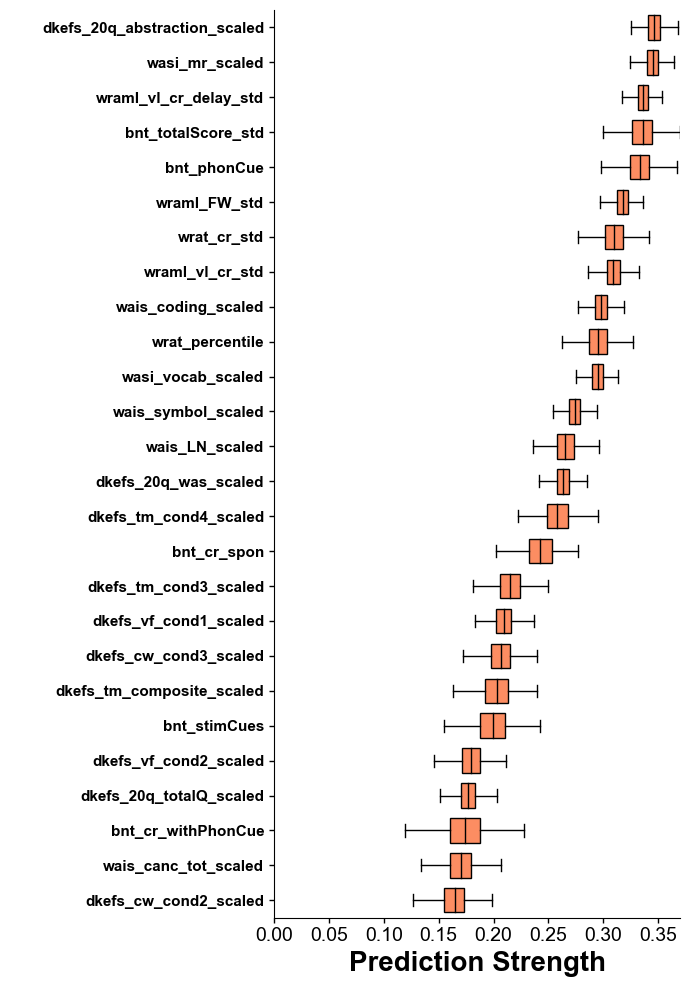

In [9]:
headers_plot = headers
preds_plot = preds

Legends = False

color_preds =  '#fc8d62'  # Red-orange       '#8da0cb'  # Blue           '#66c2a5'  # Teal       

# Create the figure
plt.figure(figsize=(7, 10))

# # Calculate positions for staggering
positions_dev = np.arange(len(headers_plot)) +1 # Spacing out the positions for the teal plots
# positions_wholebrain = positions_dev - 0.45  
# positions_CPM = positions_dev - 0.9  

ax = plt.gca()

# Plot the 'Top deviance' at staggered positions using the custom teal color
bp = ax.boxplot(preds_plot, widths=0.7, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=color_preds), sym='')

for median in bp['medians']:
    median.set_color('black')

# # Set y-axis labels from headers
plt.yticks(ticks=positions_dev, labels=headers_plot, fontsize=11, weight='bold')

# Set y-axis label and title
plt.xlabel('Prediction Strength', fontsize=20, weight='bold')
plt.xlim(0, 0.37)
plt.xticks(fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
sns.set(font='Helvetica')

ax.set_facecolor('white')
ax.figure.set_facecolor('white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.xaxis.set_tick_params(width=1, color='black')
ax.yaxis.set_tick_params(width=1, color='black')

# Show the plot
plt.show()

In [10]:
# Make correlation matrix

# Load .mat files and extract matrices
cog_measures_data = sio.loadmat('/Users/ajsimon/Documents/Data/Constable_lab/Transdiagnostic/N317/CPM_results/cog_measures.mat')
symp_measures_data = sio.loadmat('/Users/ajsimon/Documents/Data/Constable_lab/Transdiagnostic/N317/CPM_results/symp_measures.mat')

# Extract the correct matrices
cog_measures = cog_measures_data['cog_measures_sorted']
symp_measures = symp_measures_data['symp_measures_sorted']

# Concatenate the matrices
combined_matrix = np.hstack((cog_measures, symp_measures))

# Compute pairwise correlations between all columns (45x45 correlation matrix)
correlation_matrix = np.corrcoef(np.nan_to_num(combined_matrix, nan=np.nanmean(combined_matrix)), rowvar=False)

# Load the header files
cog_labels = pd.read_excel('/Users/ajsimon/Documents/Data/Constable_lab/Transdiagnostic/N317/CPM_results/cog_labels_short_1row.xlsx', header=None).squeeze()
symp_labels = pd.read_excel('/Users/ajsimon/Documents/Data/Constable_lab/Transdiagnostic/N317/CPM_results/symp_labels_1row.xlsx', header=None).squeeze()

# Concatenate the header information
labels = pd.concat([cog_labels, symp_labels], axis=0).reset_index(drop=True)

# # Save the results to files
# correlation_matrix_df = pd.DataFrame(correlation_matrix)
# combined_labels_df = pd.DataFrame(combined_labels)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ajsimon/Documents/Data/Constable_lab/Transdiagnostic/N317/CPM_results/cog_measures.mat'

In [11]:
corrmat_abs = np.abs(correlation_matrix)

plt.figure(figsize=(16, 14))

# cmap = plt.get_cmap('coolwarm')
# colors = [(0, 0, 0)] + [cmap(i) for i in np.linspace(0.15, 1, 255)]  # Start 'hot' at 0.25, which corresponds to a value of 4
# custom_cmap = LinearSegmentedColormap.from_list('coolwarm', colors)

sns.heatmap(corrmat_abs, xticklabels=labels, yticklabels=labels, 
            cmap='coolwarm', annot=False, fmt=".2f", cbar=True, vmin=0, vmax=0.22,
            cbar_kws={'label': 'Correlation coefficient'})

plt.title('Correlations between symptoms')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

NameError: name 'correlation_matrix' is not defined

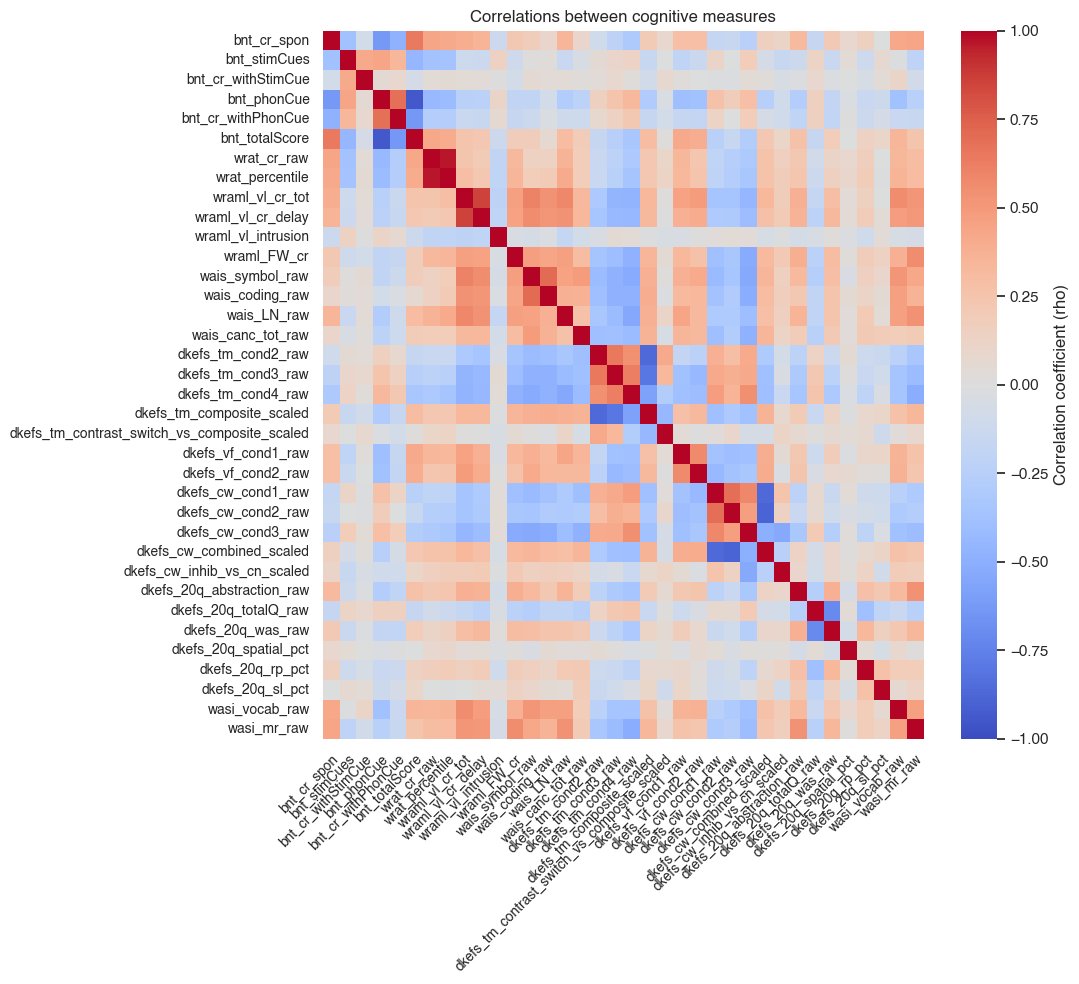

In [27]:
cog_corrs = sio.loadmat('/Users/ajsimon/Documents/Data/Constable_lab/Transdiagnostic/N317/CPM_results/First_pass_1000perms/cog_corrmat.mat')['cogcorrs']
cog_headers_file = '/Users/ajsimon/Documents/Data/Constable_lab/Transdiagnostic/N317/CPM_results/First_pass_1000perms/cog_labels_corrmat.xlsx'
cog_headers_df = pd.read_excel(cog_headers_file,header=None)
cog_headers = cog_headers_df.to_numpy()
cog_headers = [str(cog_header) for cog_header in cog_headers.flatten()]

plt.figure(figsize=(11, 10))

# cmap = plt.get_cmap('coolwarm')
# colors = [(0, 0, 0)] + [cmap(i) for i in np.linspace(0.15, 1, 255)]  # Start 'hot' at 0.25, which corresponds to a value of 4
# custom_cmap = LinearSegmentedColormap.from_list('coolwarm', colors)

sns.heatmap(cog_corrs, xticklabels=cog_headers, yticklabels=cog_headers, 
            cmap='coolwarm', annot=False, fmt=".2f", cbar=True, vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation coefficient (rho)'})

plt.title('Correlations between cognitive measures')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

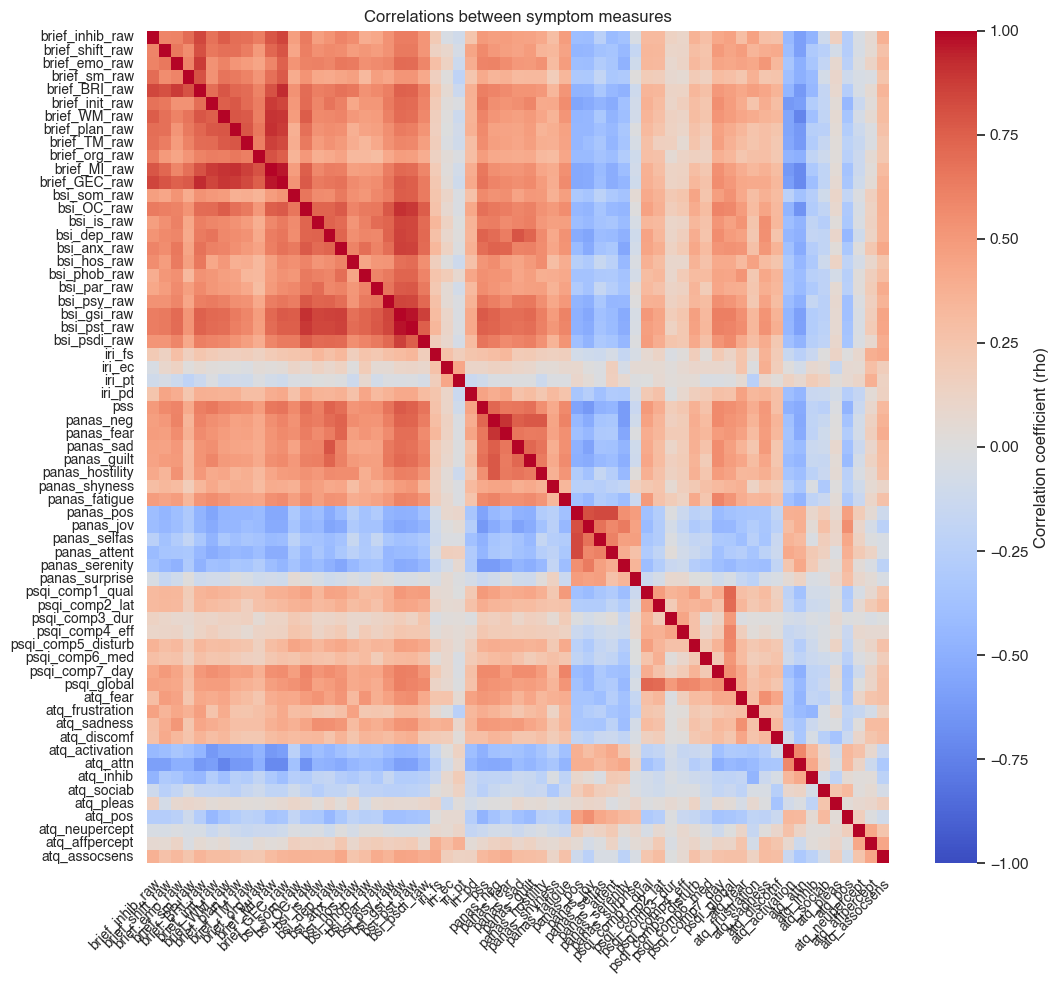

In [28]:
symp_corrs = sio.loadmat('/Users/ajsimon/Documents/Data/Constable_lab/Transdiagnostic/N317/CPM_results/First_pass_1000perms/symp_corrmat.mat')['sympcorrs']
symp_headers_file = '/Users/ajsimon/Documents/Data/Constable_lab/Transdiagnostic/N317/CPM_results/First_pass_1000perms/symp_labels_corrmat.xlsx'
symp_headers_df = pd.read_excel(symp_headers_file,header=None)
symp_headers = symp_headers_df.to_numpy()
symp_headers = [str(symp_header) for symp_header in symp_headers.flatten()]

plt.figure(figsize=(11, 10))

sns.heatmap(symp_corrs, xticklabels=symp_headers, yticklabels=symp_headers, 
            cmap='coolwarm', annot=False, fmt=".2f", cbar=True, vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation coefficient (rho)'})

plt.title('Correlations between symptom measures')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()